# Keletso Pule - Assessment

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


### Question 1

In [99]:
df = pd.read_excel("pone.0212445.s004.xlsx")

In [102]:
df = df.rename(columns={df.columns[0]:'District',df.columns[1]:'Code',df.columns[2]:'Estimate',df.columns[3]:'Prevalence_%',
                   df.columns[4]:'Prevalence_LCL',df.columns[5]:'Prevalence_UCL',df.columns[6]:'NoPLHIV',
                   df.columns[7]:'NoPLHIV_LCL',df.columns[8]:'NoPLHIV_UCL'})

In [103]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
1,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534
2,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
3,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985
4,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548


In [82]:
df

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Non_Prevalence%
1,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534,86.400000
2,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,86.498717
3,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985,94.800000
4,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,93.979957
5,West Coast,DC1,Survey,2.7,0,5.444,11302,0,22789,97.300000
...,...,...,...,...,...,...,...,...,...,...
100,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,90.852575
101,Nelson Mandela Bay Metro,NMA,Survey,8.3,3.4,13.2,97459,39923,154995,91.700000
102,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.05406,6.128703,13.179704,106313,71964,154757,90.945940
103,City of Tshwane,TSH,Survey,11.7,7.388,16.012,361450,228239,494661,88.300000


### Question 2

#### Q2A

In [133]:
df['NoPLHIV'].count()

105

#### Q2B

In [134]:
df['Estimate'].unique()

array(['Estimate', 'Survey', 'Fay-Heriott'], dtype=object)

In [135]:
Survey = df[df['Estimate']=='Survey']

In [136]:
NoPLHIV = Survey['NoPLHIV'].astype(int).sum()

In [137]:
NoPLHIV

6409903

Number of people living with NoPLHIV across all the districts with Survey estimate is 6409903

In [55]:
df[df['District']=='Xhariep']['NoPLHIV'].mean()

12247.5

Average number of people in Xariep (for both estimates) living with NoPLHIV are 12247.5

#### Q2C

In [58]:
df['Non_Prevalence%'] = 100 - df['Prevalence_%'].astype(float) 

Added a column (Non_Prevalence%) that has the percentage of the people that tested but weren't infected across all disctrics

#### Q2D

In [159]:
city_df = df[df['District'].str.contains('City')]
metro_df = df[df['District'].str.contains('Metro')]

In [168]:
total=city_df['NoPLHIV'].astype(int).sum()+metro_df['NoPLHIV'].astype(int).sum()
print( 'The total NoPLHIV in all the cities (districts with “city” or “metro” in the name)' ,total)

The total NoPLHIV in all the cities (districts with “city” or “metro” in the name) 2572733


### Question 3

In [90]:

# remove special character
df.columns=df.columns.str.replace('[%,#,@,&,_]','')
  
df.columns

/Users/keletso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL',
       'NonPrevalence'],
      dtype='object')

In [109]:
df['District']

0                      District
1                  Buffalo City
2                  Buffalo City
3             City of Cape Town
4             City of Cape Town
                 ...           
100                    Mangaung
101    Nelson Mandela Bay Metro
102    Nelson Mandela Bay Metro
103             City of Tshwane
104             City of Tshwane
Name: District, Length: 105, dtype: object

## Question 4: Confidence Interval

#### Prevalence_LCL

([<matplotlib.axis.YTick at 0x128d3b080>,
 <a list of 105 Text yticklabel objects>)

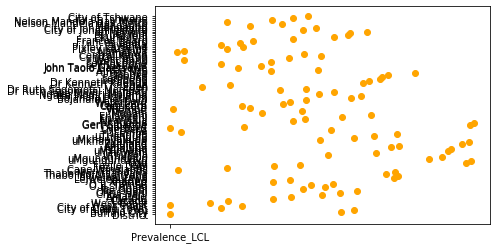

In [176]:
for Prevalence_LCL,y in zip(df['Prevalence_LCL'],range(len(df))):
    plt.plot((Prevalence_LCL),(y),'ro-',color='orange')
plt.yticks(range(len(df)),list(df['District']))

#### Prevalence_UCL

([<matplotlib.axis.YTick at 0x1283c65f8>,
 <a list of 105 Text yticklabel objects>)

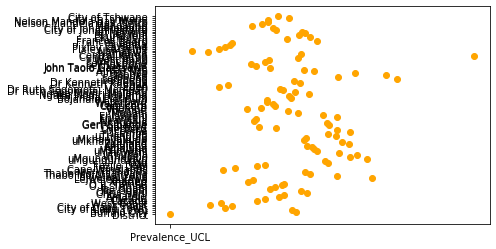

In [175]:
for Prevalence_UCL,y in zip(df['Prevalence_UCL'],range(len(df))):
    plt.plot((Prevalence_UCL),(y),'ro-',color='orange')
plt.yticks(range(len(df)),list(df['District']))